# Exploratory Data Analysis

When placed in Metapack data package, this notebook will load the package and run a variety of common EDA operations on the first resource. 


In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')


In [2]:

try:
    pkg = mp.jupyter.open_package()
except mp.exc.PackageError:
    pkg = mp.open_package('http://s3.amazonaws.com/library.metatab.org/cde.ca.gov-accountability_dashboard-2.zip')

pkg

In [3]:
first_resource = next(iter(pkg.resources())).name
first_resource

'ela38'

In [4]:

pkg.resource(first_resource)


Header,Type,Description
cds,integer,CDS Code
rtype,text,Record Type
studentgroup,text,Student Group
currdenom,integer,Current year number of valid students
priordenom,integer,CURRENT STATUS - Average distance from level 3
currstatus,text,Prior year number of valid students
priorstatus,text,PRIOR STATUS - Average distance from level 3
change,text,CHANGE - Difference between current status and prior status
statuslevel,integer,Status Level
changelevel,integer,Change Level


In [5]:
df = pkg.resource(first_resource).read_csv(parse_dates=True)

In [6]:
df.head()

,cds,rtype,studentgroup,currdenom,priordenom,currstatus,priorstatus,change,statuslevel,changelevel,color,box
0,1100170123968,S,AA,14,23,-87.7,-41.6,-46.1,1,1,0,0
1,1100170123968,S,AI,2,0,NaN,NaN,NaN,0,0,0,0
2,1100170123968,S,ALL,86,81,-58.8,-48.0,-10.8,2,2,2,170
3,1100170123968,S,AS,4,5,NaN,NaN,NaN,0,0,0,0
4,1100170123968,S,EL,38,23,-79.9,-70.0,-9.9,1,2,0,0


In [ ]:
empty_col_names = [cn for cn in df.columns if df[cn].nunique() == 0]
const_col_names= [cn for cn in df.columns if df[cn].nunique() == 1]
ignore_cols = empty_col_names+const_col_names
dt_col_names= list(df.select_dtypes(include=[np.datetime64]).columns)

number_col_names = [ cn for cn in df.select_dtypes(include=[np.number]).columns if cn not in ignore_cols ]
other_col_names = [cn for cn in df.columns if cn not in (empty_col_names+const_col_names+dt_col_names+number_col_names)]

In [7]:
pd.DataFrame.from_dict({'empty':[len(empty_col_names)], 
                        'const':[len(const_col_names)],
                        'datetime':[len(dt_col_names)],
                        'number':[len(number_col_names)],
                        'other':[len(other_col_names)],
                       }, 
                       orient='index', columns=['count'])

,count
empty,0
const,0
datetime,0
number,10
other,2


# Constant Columns

In [8]:
if const_col_names:
    df[const_col_names].drop_duplicates().T

# Empty Columns

In [9]:
if empty_col_names:
    df[empty_col_names].drop_duplicates().T

# Date and Time Columns

In [10]:
if dt_col_names:
    display(df[dt_col_names].info())
    display(df[dt_col_names].describe().T)

# Number Columns

In [11]:
if number_col_names:
    display(df[number_col_names].info())
    display(df[number_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104812 entries, 0 to 104811
Data columns (total 10 columns):
cds            104812 non-null int64
currdenom      104812 non-null int64
priordenom     104812 non-null int64
currstatus     71535 non-null float64
priorstatus    70583 non-null float64
change         68776 non-null float64
statuslevel    104812 non-null int64
changelevel    104812 non-null int64
color          104812 non-null int64
box            104812 non-null int64
dtypes: float64(3), int64(7)
memory usage: 8.0 MB


None

,count,mean,std,min,25%,50%,75%,max
cds,104812.0,2.968238e+13,1.408606e+13,1.100170e+12,1.964733e+13,3.073651e+13,3.868479e+13,5.872752e+13
currdenom,104812.0,1.664801e+02,1.257731e+03,0.000000e+00,6.000000e+00,3.400000e+01,1.360000e+02,2.108220e+05
priordenom,104812.0,1.653518e+02,1.273147e+03,0.000000e+00,6.000000e+00,3.300000e+01,1.330000e+02,2.145070e+05
currstatus,71535.0,-2.452310e+01,5.465996e+01,-2.057000e+02,-6.170000e+01,-2.690000e+01,1.325000e+01,1.523000e+02
priorstatus,70583.0,-3.344896e+01,5.246641e+01,-1.961000e+02,-6.920000e+01,-3.630000e+01,2.300000e+00,1.396000e+02
change,68776.0,9.008984e+00,1.602989e+01,-1.196000e+02,-2.000000e-01,8.800000e+00,1.810000e+01,1.156000e+02
statuslevel,104812.0,1.730775e+00,1.587377e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,5.000000e+00
changelevel,104812.0,2.280855e+00,1.905550e+00,0.000000e+00,0.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
color,104812.0,1.233771e+00,1.650428e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,5.000000e+00
box,104812.0,6.503397e+01,8.685122e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.700000e+02,2.500000e+02


In [12]:
def plot_histograms(df):

    col_names = list(df.columns)

    n_cols = np.ceil(np.sqrt(len(col_names)))
    n_rows = np.ceil(np.sqrt(len(col_names)))

    #plt.figure(figsize=(3*n_cols,3*n_rows))
    fig, ax = plt.subplots(figsize=(3*n_cols,3*n_rows))
    
    for i in range(0,len(col_names)):
        plt.subplot(n_rows + 1,n_cols,i+1)
        try:
            g = sns.distplot(df[col_names[i]].fillna(0),kde=True) 
            g.set(xticklabels=[])
            g.set(yticklabels=[])
        except:
            pass
        


/Users/eric/proj/virt/metapack/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


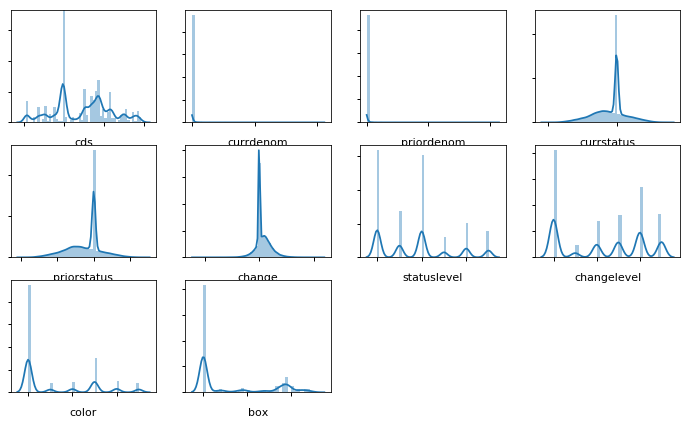

In [13]:
plot_histograms(df[number_col_names])

# Other Columns

In [14]:
if other_col_names:
    display(df[other_col_names].info())
    display(df[other_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104812 entries, 0 to 104811
Data columns (total 2 columns):
rtype           104812 non-null object
studentgroup    104812 non-null object
dtypes: object(2)
memory usage: 1.6+ MB


None

,count,unique,top,freq
rtype,104812,2,S,94159
studentgroup,104812,14,ALL,8441
